![title](pend.png)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import seagul.envs
import numpy as np
from numpy import pi
import gym

/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/miniconda3/envs/ray/lib/python3.6/s

In [49]:
home_path = '/home/sgillen/work/'
checkpoint_path = home_path + \
"seagul/seagul/notebooks/sym_rl/data/sym_noact_seeds/PPO/PPO_sym_pendulum-v0_3_seed=3_2019-11-19_09-42-29e503mada/checkpoint_150/checkpoint-150"




In [50]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

df = pd.read_csv(csv_path)
df

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,timesteps_this_iter,done,timesteps_total,episodes_total,training_iteration,...,perf/vram_util_percent0,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-752.430433,-1727.401984,-1218.179426,200.0,20,4000,False,4000,20,1,...,0.018272,1.000000,0.0003,19.079195,-0.002151,19.080727,0.431208,0.000619,1.417773,0.0
1,-752.430433,-1727.401984,-1167.483238,200.0,20,4000,False,8000,40,2,...,0.018272,0.500000,0.0003,3.427434,-0.005272,3.431133,0.956938,0.003144,1.417578,0.0
2,-752.430433,-1727.401984,-1182.962068,200.0,20,4000,False,12000,60,3,...,0.018272,0.250000,0.0003,3.216074,-0.003583,3.218713,0.966763,0.003779,1.418944,0.0
3,-752.430433,-1730.817963,-1213.607710,200.0,20,4000,False,16000,80,4,...,0.018272,0.125000,0.0003,3.782532,-0.007028,3.788429,0.976985,0.009046,1.399814,0.0
4,-752.430433,-1748.381811,-1232.821202,200.0,20,4000,False,20000,100,5,...,0.018272,0.125000,0.0003,4.332279,-0.004508,4.336049,0.977962,0.005916,1.393868,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-1.184126,-1504.346938,-266.530478,200.0,20,4000,False,584000,2920,146,...,0.018272,0.337881,0.0003,4.188092,-0.010345,4.194556,0.996688,0.011482,0.570578,0.0
146,-0.468618,-1504.346938,-274.103587,200.0,20,4000,False,588000,2940,147,...,0.018272,0.337881,0.0003,1.337975,-0.017594,1.347523,0.999015,0.023810,0.555294,0.0
147,-0.468618,-1504.346938,-273.962297,200.0,20,4000,False,592000,2960,148,...,0.018272,0.506822,0.0003,1.742928,-0.024418,1.758480,0.998095,0.017493,0.462715,0.0
148,-0.453524,-1489.085128,-252.481048,200.0,20,4000,False,596000,2980,149,...,0.018272,0.506822,0.0003,1.906039,-0.016006,1.914912,0.998544,0.014073,0.516270,0.0


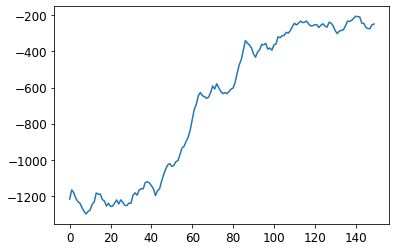

In [51]:
plt.plot(df['episode_reward_mean'])

In [52]:
ray.shutdown()
ray.init()


expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']

#log_path = expr_data['checkpoints'][-1]['logdir']
#csv_path = log_path + '/path/progress.csv'

trainer = ppo.PPOTrainer(config)#, config['env_name'])
trainer.restore(checkpoint_path)

2019-11-19 10:29:40,241	INFO resource_spec.py:205 -- Starting Ray with 6.88 GiB memory available for workers and up to 3.46 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-11-19 10:29:40,713	INFO trainer.py:344 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2019-11-19 10:29:40,741	INFO rollout_worker.py:325 -- Could not seed torch
/home/sgillen/miniconda3/envs/ray/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-11-19 10:29:42,241	INFO rollout_worker.py:768 -- Built policy map: {'default_policy': <ray.rllib.policy.tf_policy_template.PPOTFPolicy object at 0x7fbb316c9240>}
2019-11-19 10:29:42,242	INFO rollout_worker.py:769 -- Built preprocessor map: {'default_policy':

-124.11782013041064


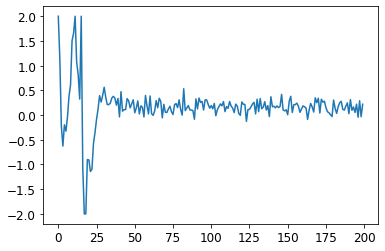

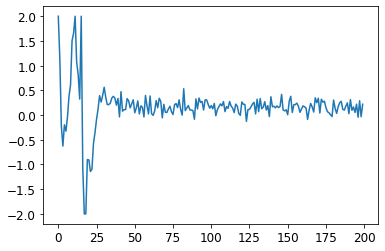

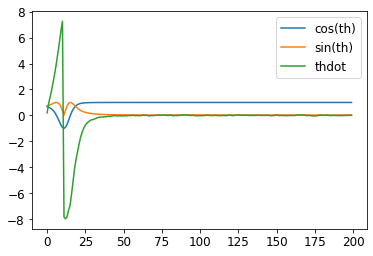

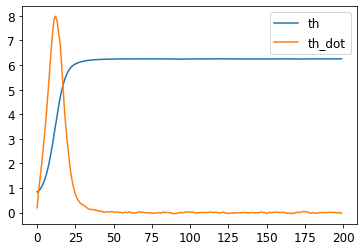

In [53]:
import gym
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

env = gym.make(env_name)
obs = env.reset()

action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False
while not done:
    actions = trainer.compute_action(obs.flatten())
    obs, reward, done, _ = env.step(np.asarray(actions))
    #env.render()
    action_hist.append(np.copy(np.clip(actions, -10, 10)))
    m_act_hist.append(np.copy(action_hist[-1]*np.sign(obs[1])))
    
    state_hist.append(np.copy(env.state))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))
    if done:
        break


print(sum(reward_hist))
plt.plot(action_hist)
plt.figure()
plt.plot(m_act_hist)
plt.figure()
plt.plot(obs_hist)
plt.legend(['cos(th)', 'sin(th)', 'thdot'])
plt.figure()
plt.plot(state_hist)
plt.legend(['th', 'th_dot'])


In [54]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)

(array([0.29133236], dtype=float32),
 [],
 {'action_prob': 1.5683554,
  'action_logp': 0.45002759,
  'vf_preds': -7.5066633,
  'behaviour_logits': array([ 0.1544785, -2.2993202], dtype=float32)})

In [55]:
th_vals = np.linspace(-2*pi, 2*pi, 200)
thdot_vals= np.linspace(-8, 8, 200)
actions = np.zeros((th_vals.size, thdot_vals.size))
mirr_space = np.zeros((th_vals.size, thdot_vals.size))

vf_preds = np.zeros((th_vals.size, thdot_vals.size))
act_probs = np.zeros((th_vals.size, thdot_vals.size))
act_means = np.zeros((th_vals.size, thdot_vals.size))
act_lgstd = np.zeros((th_vals.size, thdot_vals.size))

for th_i, th in enumerate(th_vals):
    for thdot_i, thdot in enumerate(thdot_vals):
        env.env.state = [th , thdot]
        obs = env.env._get_obs()
        obs = np.array([np.cos(th), np.sin(th), thdot])
        actions[th_i, thdot_i],_, out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
        mirr_space[th_i, thdot_i] = np.sign(obs[1])
        
        vf_preds[th_i,  thdot_i]     = out_dict['vf_preds']
        act_probs[th_i, thdot_i]  = out_dict['action_prob']
        act_means[th_i, thdot_i]  = out_dict['behaviour_logits'][0]
        act_lgstd[th_i, thdot_i]  = out_dict['behaviour_logits'][1]
        

In [56]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 18
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

x,y = np.meshgrid(th_vals, thdot_vals, indexing='ij')

Text(0.5, 1.0, 'Sampled Actions')

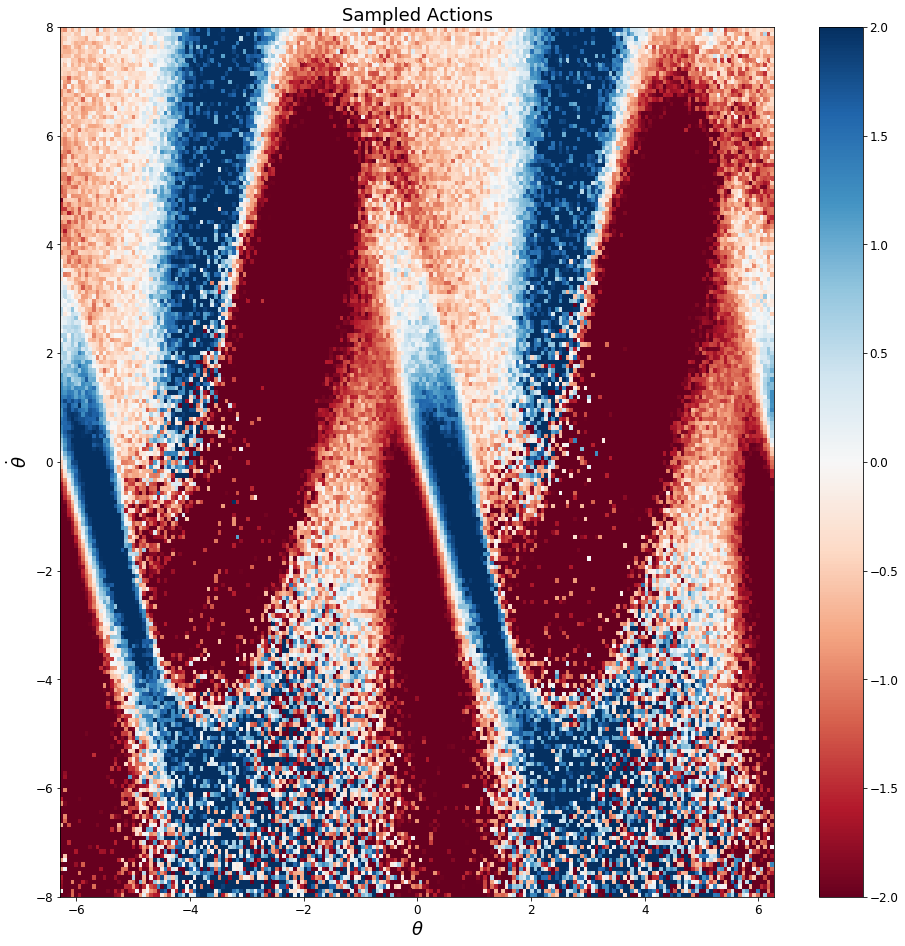

In [57]:
z = actions
z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()


fig, ax = plt.subplots(1,1, figsize=(16,16))
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

   
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$')
plt.title('Sampled Actions')

Text(0.5, 1.0, 'Action Means')

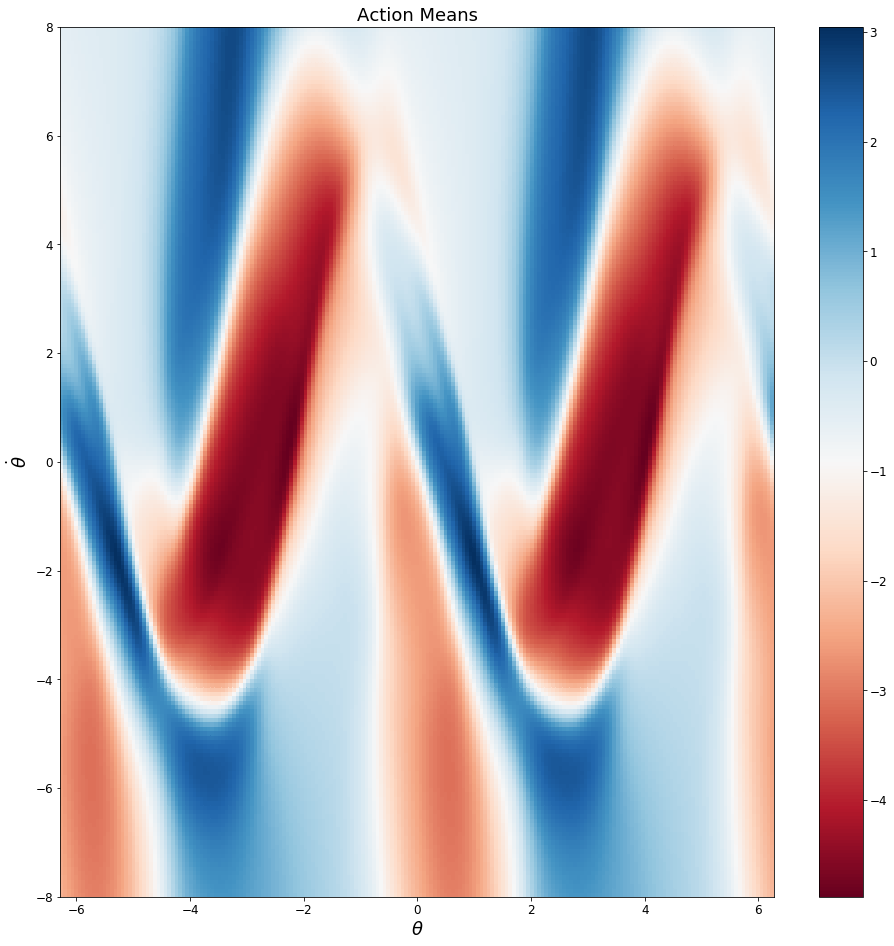

In [58]:
z = act_means
z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()


fig, ax = plt.subplots(1,1, figsize=(16,16))
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

   
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$')
plt.title('Action Means')

Text(0.5, 1.0, 'Action Stds')

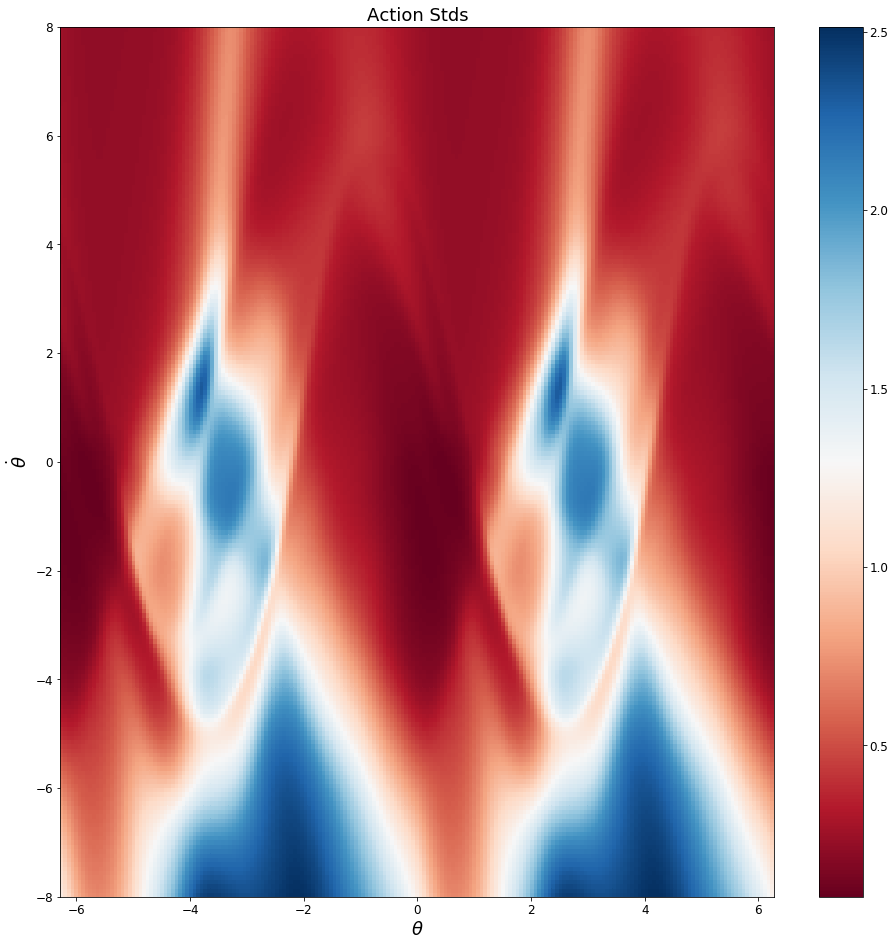

In [59]:
z = np.exp(act_lgstd)
z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()


fig, ax = plt.subplots(1,1, figsize=(16,16))
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

   
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$')
plt.title('Action Stds')

Text(0.5, 1.0, 'VF Prediction')

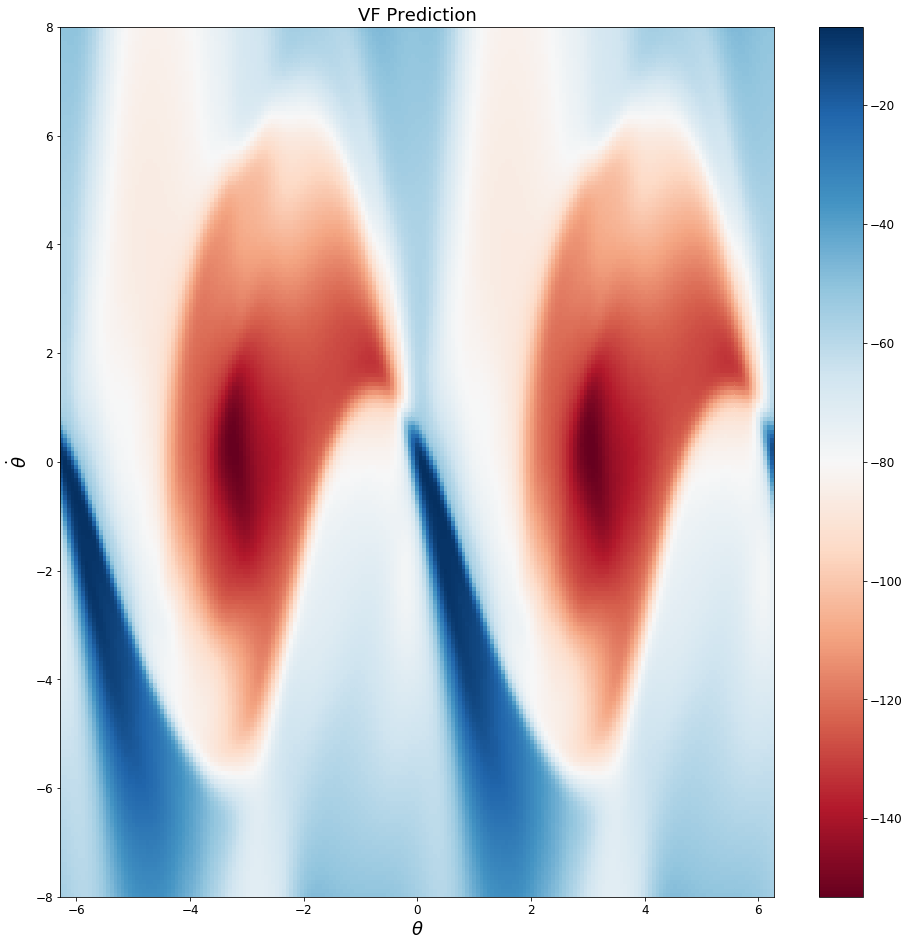

In [60]:
z = vf_preds
z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()


fig, ax = plt.subplots(1,1, figsize=(16,16))
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

   
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$')
plt.title('VF Prediction')